In [1]:
# Analyse von Dominion Spielen, graphisch

import numpy as np
import pandas as pd

# visualization
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from matplotlib.ticker import MaxNLocator

In [2]:
df = pd.read_csv("results_cum.csv", encoding="utf-8")
df

,Name,Zug,Karte,Anzahl
0,DORp,0,Kupfer,7
1,DORp,0,Anwesen,3
2,DORp,1,Silber,1
3,DORp,2,Silber,2
4,DORp,3,Silber,3
...,...,...,...,...
173,J,26,Schatzkammer,2
174,J,26,Gold,4
175,J,26,Schwarze Katze,9
176,J,26,Provinz,4


In [3]:
players = df['Name'].unique()

DORp
DORT
J


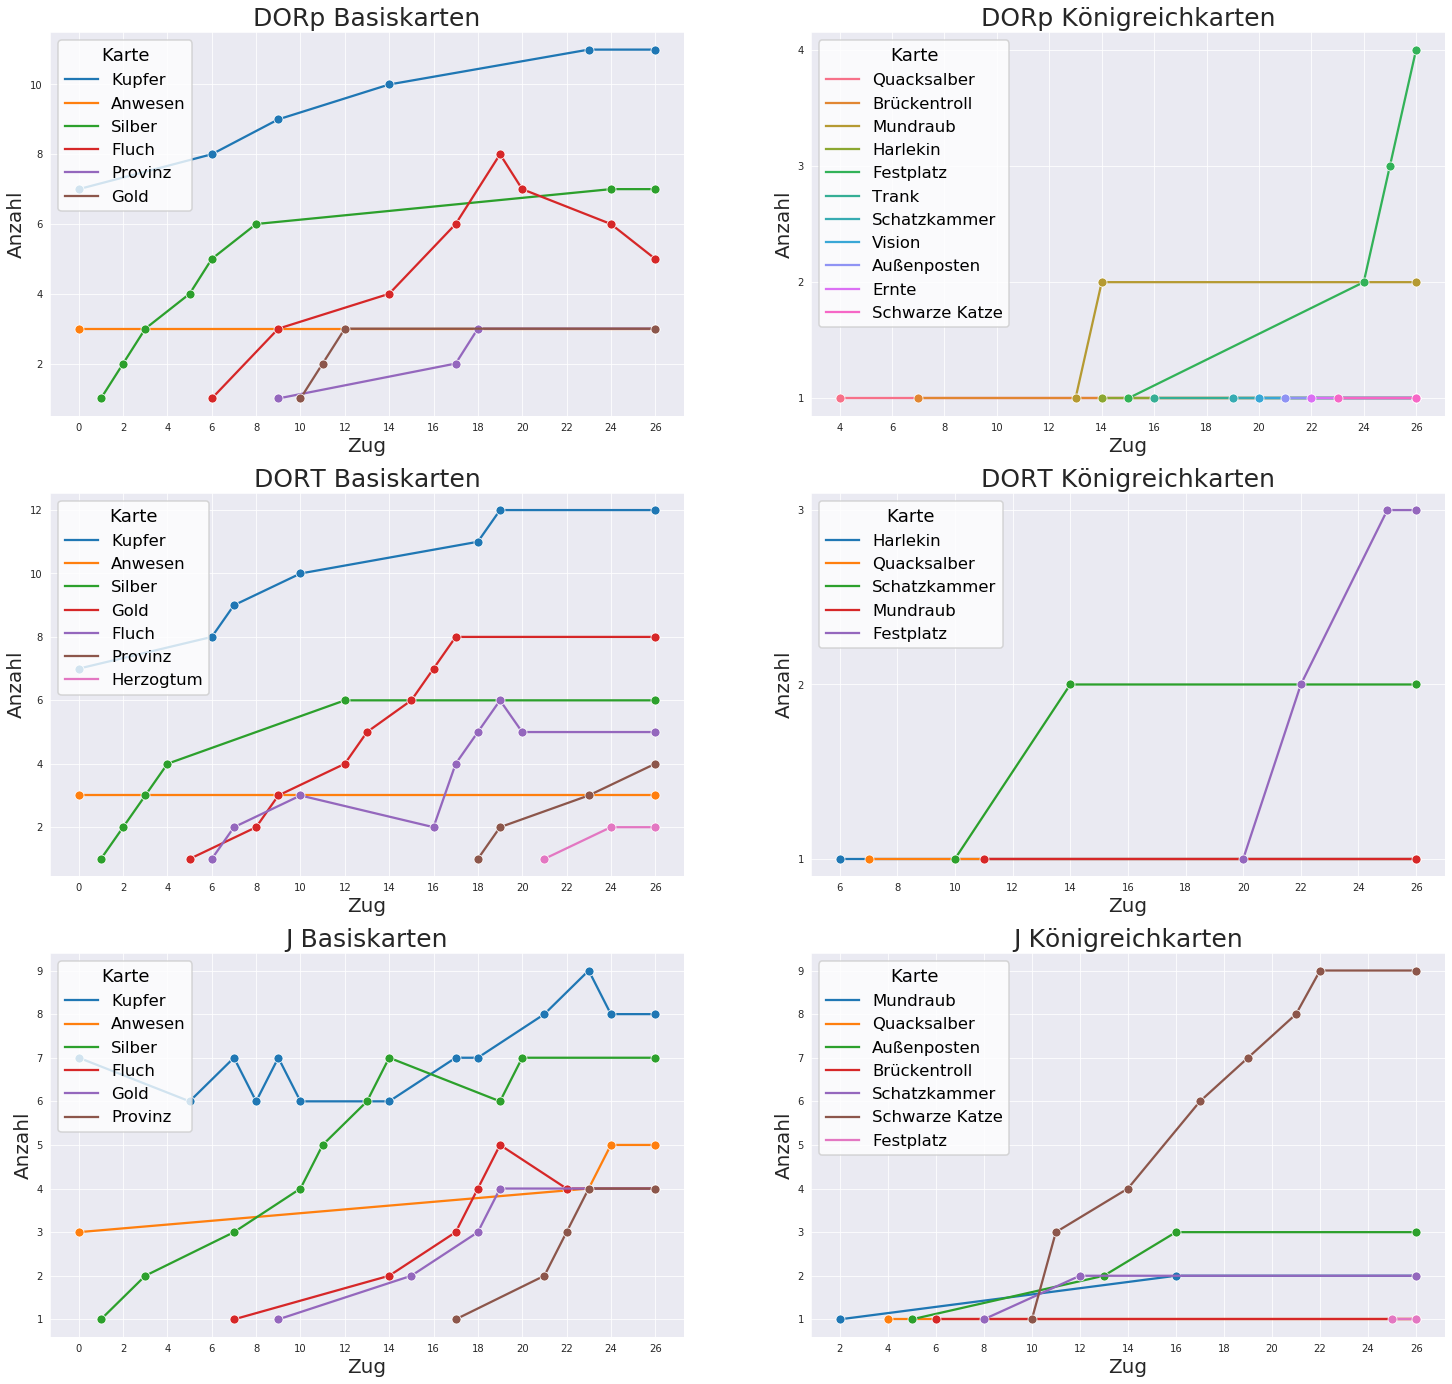

In [4]:
with sns.axes_style("darkgrid"):
    fig, axes = plt.subplots(len(players), 2, figsize=(25, 8*len(players)))

sns.set_context("talk")

cnt = 0

for player in players:
    print(player)
    per_player_old = df.query("Name==@player")
    per_player_basis = per_player_old.query("Karte in ['Kupfer', 'Silber', 'Gold', 'Platin', 'Anwesen', 'Herzogtum', 'Provinz', 'Kolonie', 'Fluch']")
    per_player_kr = per_player_old.query("Karte not in ['Kupfer', 'Silber', 'Gold', 'Platin', 'Anwesen', 'Herzogtum', 'Provinz', 'Kolonie', 'Fluch']")

    g=sns.lineplot(x='Zug',
                y='Anzahl',
                hue='Karte',
                data=per_player_basis,
                marker="o",
                ax=axes[cnt, 0])

    g.set_xlabel("Zug",fontsize=20)
    g.set_ylabel("Anzahl",fontsize=20)
    
    axes[cnt, 0].yaxis.set_major_locator(MaxNLocator(integer=True))
    axes[cnt, 0].set_title(player+" Basiskarten", fontsize=25)
    axes[cnt, 0].xaxis.set_major_locator(ticker.MultipleLocator(2))
   # axes[cnt, 0].legend(bbox_to_anchor=(0, 1),borderaxespad=0)
    
    g=sns.lineplot(x='Zug',
                y='Anzahl',
                hue='Karte',
                data=per_player_kr,
                marker="o",
                ax=axes[cnt, 1])
    
    g.set_xlabel("Zug",fontsize=20)
    g.set_ylabel("Anzahl",fontsize=20)
    # g.set(ylim=(1, None))
    
    axes[cnt, 1].yaxis.set_major_locator(MaxNLocator(integer=True))
    axes[cnt, 1].set_title(player+" Königreichkarten", fontsize=25)
    axes[cnt, 1].xaxis.set_major_locator(ticker.MultipleLocator(2))
    # axes[cnt, 1].legend(bbox_to_anchor=(1.01, 1),borderaxespad=0)

    cnt += 1
fig.savefig('results.svg')